In [1]:
# Import all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing DATASET
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.shape

(1436, 11)

In [5]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# 1. EDA 

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values 

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
# Check for Duplicates
df.duplicated().any()

True

In [8]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [9]:
# Remove Duplicates
df.drop_duplicates(inplace=True)
df.shape

(1435, 11)

## Convert to numerical column
* Here 'Fuel_Type'  is the  categorical column. Using LabelEncoder converting to numerical column.

In [10]:
## labeling  of 'Fuel_Type' column
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df['Fuel_Type']=lab_enc.fit_transform(df[['Fuel_Type']])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [12]:
# 1 --> Diesel, 2 --> Petrol, 3 --> CNG 

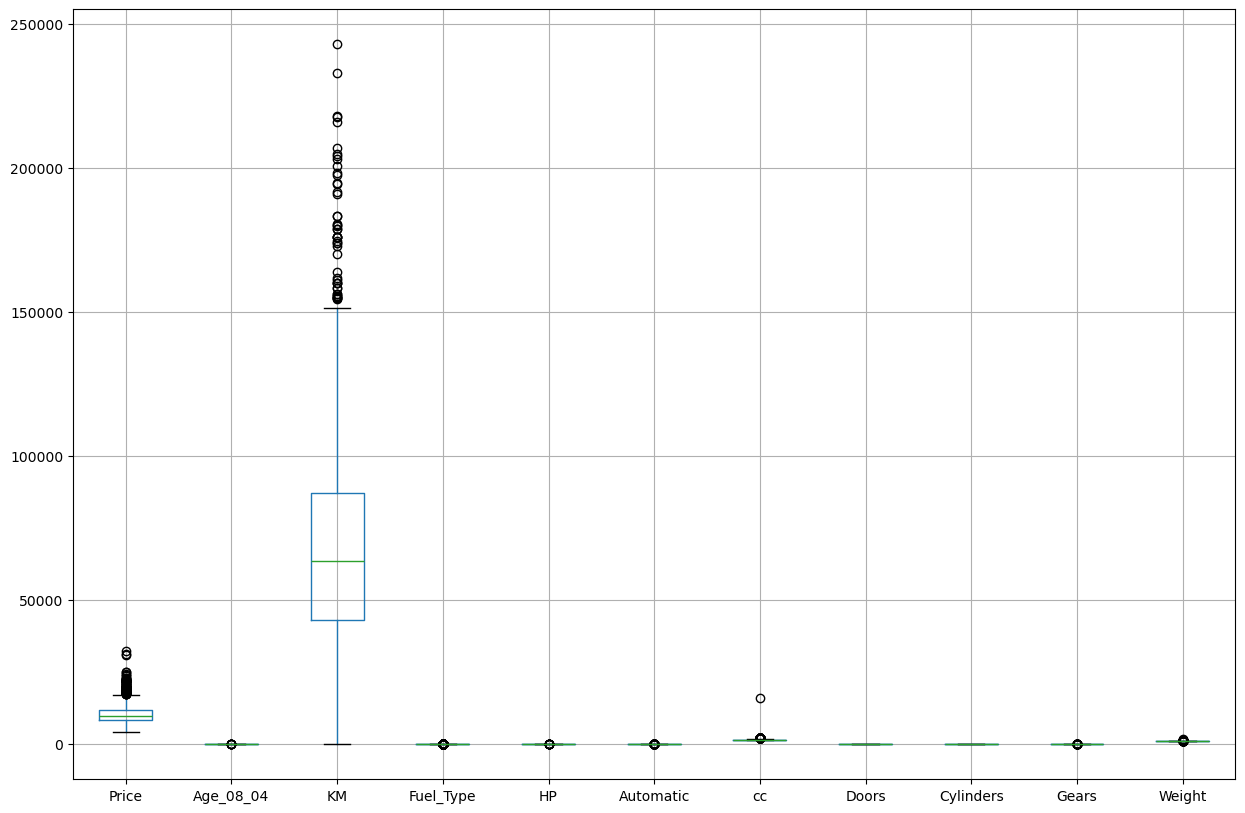

In [13]:
# Handling Outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()

In [14]:
# percentage of outlier for each column
column=list(df.columns)
for i in column:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[i] < lower_limit) | (df[i] > upper_limit)]

    # Calculate the percentage of outliers
    percentage_outliers = (len(outliers) / len(df)) * 100

    print(f"Percentage of outliers in {i}: {percentage_outliers:.2f}%")
    print(f"upper_limit,lower_limit of {i}: {upper_limit,lower_limit}")

Percentage of outliers in Price: 7.60%
upper_limit,lower_limit of Price: (17200.0, 3200.0)
Percentage of outliers in Age_08_04: 0.49%
upper_limit,lower_limit of Age_08_04: (109.0, 5.0)
Percentage of outliers in KM: 3.41%
upper_limit,lower_limit of KM: (153103.75, -23062.25)
Percentage of outliers in Fuel_Type: 11.92%
upper_limit,lower_limit of Fuel_Type: (2.0, 2.0)
Percentage of outliers in HP: 0.77%
upper_limit,lower_limit of HP: (140.0, 60.0)
Percentage of outliers in Automatic: 5.57%
upper_limit,lower_limit of Automatic: (0.0, 0.0)
Percentage of outliers in cc: 8.50%
upper_limit,lower_limit of cc: (1900.0, 1100.0)
Percentage of outliers in Doors: 0.00%
upper_limit,lower_limit of Doors: (8.0, 0.0)
Percentage of outliers in Cylinders: 0.00%
upper_limit,lower_limit of Cylinders: (4.0, 4.0)
Percentage of outliers in Gears: 3.21%
upper_limit,lower_limit of Gears: (5.0, 5.0)
Percentage of outliers in Weight: 4.53%
upper_limit,lower_limit of Weight: (1152.5, 972.5)


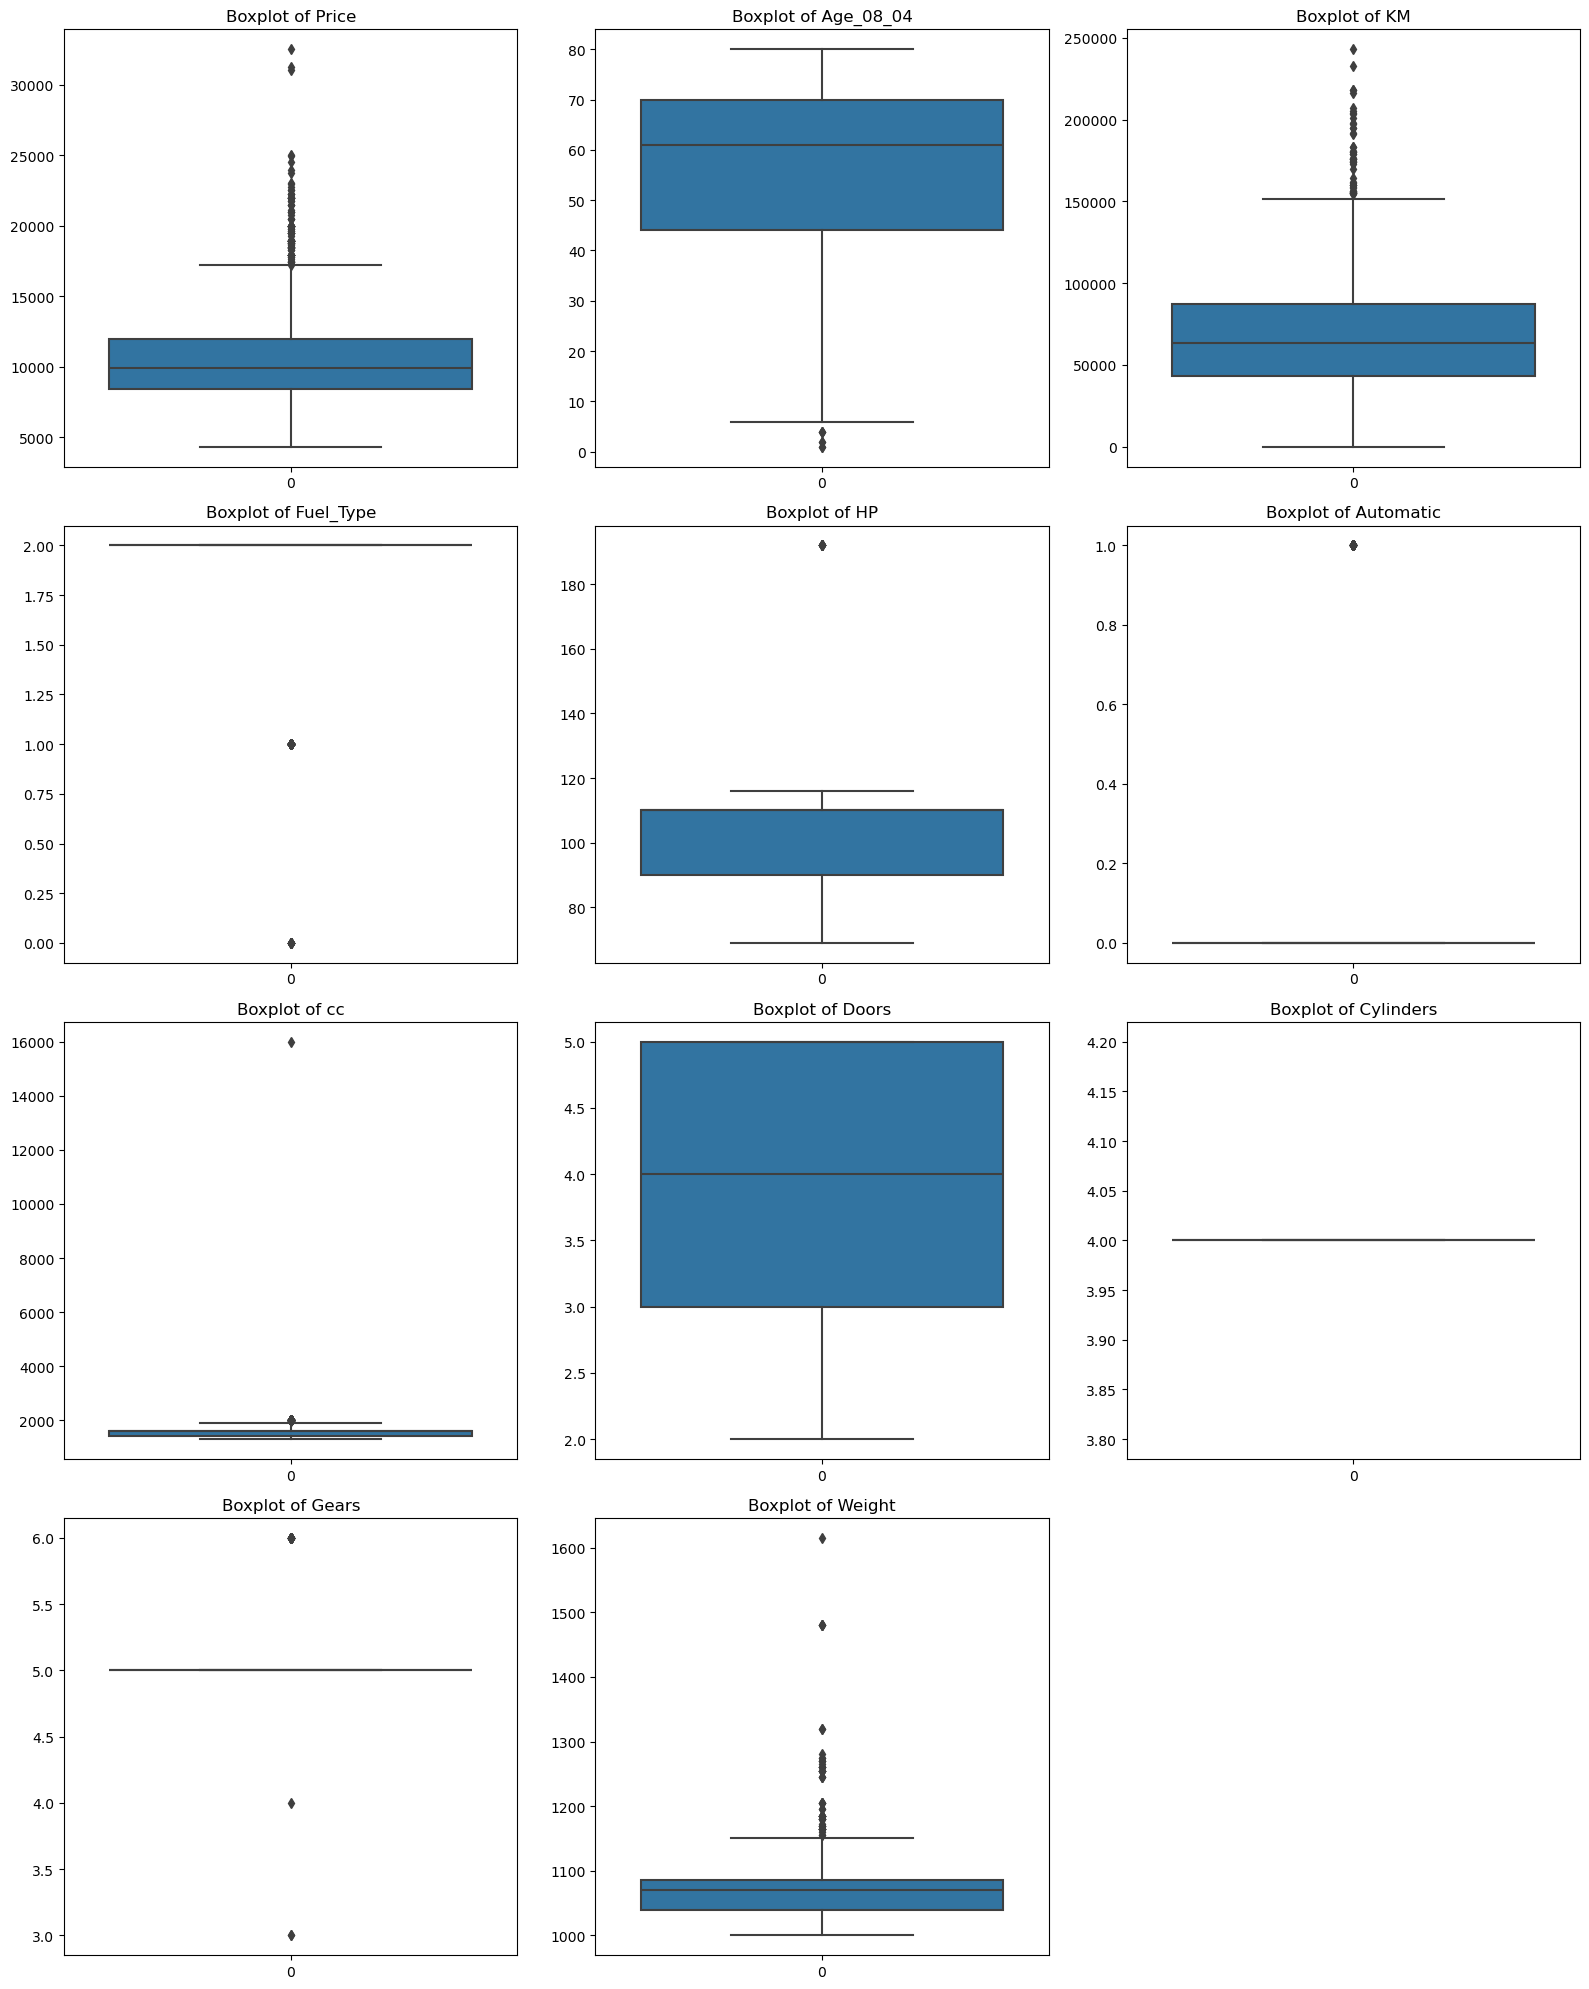

In [15]:
# Set up the figure for boxplots
plt.figure(figsize=(16, 20))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns)//3 + 1, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [16]:
summary_stats = df.describe()
summary_stats

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,1.868990,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,0.370993,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,2.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,2.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


## By Observing box plot and percentage of outlier for each column, we can conclude the following
* Max value of columns 'cc' is 16000. that is most probably typing mistake. change that into 1600. 
* Also remove data from Price and KM as well.

In [17]:
df['cc']=np.where(df['cc']==16000,1600,df['cc'])
df['cc'].describe()

count    1435.000000
mean     1566.526132
std       186.897718
min      1300.000000
25%      1400.000000
50%      1600.000000
75%      1600.000000
max      2000.000000
Name: cc, dtype: float64

In [18]:
## removing outliers from column 'price'
##df1p=df withot outliers in price colum
df1 = df[(df['Price']>3200) & (df['Price']<17200)]
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [19]:
## removing outliers from 'KM ' column
## df2= df without outliers in price and KM column
df_new =df1[(df1['KM']>-23062.25) & (df1['KM']<153103.75)]
df_new

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [20]:
df_new.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.0,1276.000000,1276.000000
mean,10041.981191,58.921630,68194.301724,1.900470,101.234326,0.055643,1547.397335,4.007053,4.0,5.024295,1063.402821
std,2322.997887,15.278132,29535.945823,0.336487,12.217664,0.229320,172.469540,0.954221,0.0,0.186289,40.305957
min,4450.000000,13.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,49.000000,46434.500000,2.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1035.000000
50%,9750.000000,62.000000,64932.000000,2.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1060.000000
75%,11250.000000,71.000000,86137.000000,2.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1075.000000
max,16950.000000,80.000000,151300.000000,2.000000,116.000000,1.000000,2000.000000,5.000000,4.0,6.000000,1615.000000


### Correlation Heatmap

In [21]:
## checking for correlation( we check correlation for numerical columns only)
df_new.corr()*100

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,100.000000,-85.677346,-49.761486,0.749700,14.428616,1.036407,7.749878,15.207981,NaN,1.800366,34.208231
Age_08_04,-85.677346,100.000000,42.745124,8.300191,-2.539783,6.862760,-7.220750,-9.658422,NaN,2.161288,-29.673223
KM,-49.761486,42.745124,100.000000,-36.139514,-18.589091,-6.617435,28.941278,2.585510,NaN,5.624189,10.755761
Fuel_Type,0.749700,8.300191,-36.139514,100.000000,42.558512,5.149884,-57.642683,-2.712447,NaN,6.363013,-47.986360
HP,14.428616,-2.539783,-18.589091,42.558512,100.000000,0.206113,12.163640,12.586384,NaN,7.709942,-0.799444
Automatic,1.036407,6.862760,-6.617435,5.149884,0.206113,100.000000,-6.328352,-4.122169,NaN,-10.510683,6.511783
cc,7.749878,-7.220750,28.941278,-57.642683,12.163640,-6.328352,100.000000,14.208711,NaN,2.516032,63.246269
Doors,15.207981,-9.658422,2.585510,-2.712447,12.586384,-4.122169,14.208711,100.000000,NaN,-15.539149,33.899292
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,1.800366,2.161288,5.624189,6.363013,7.709942,-10.510683,2.516032,-15.539149,NaN,100.000000,-2.334466


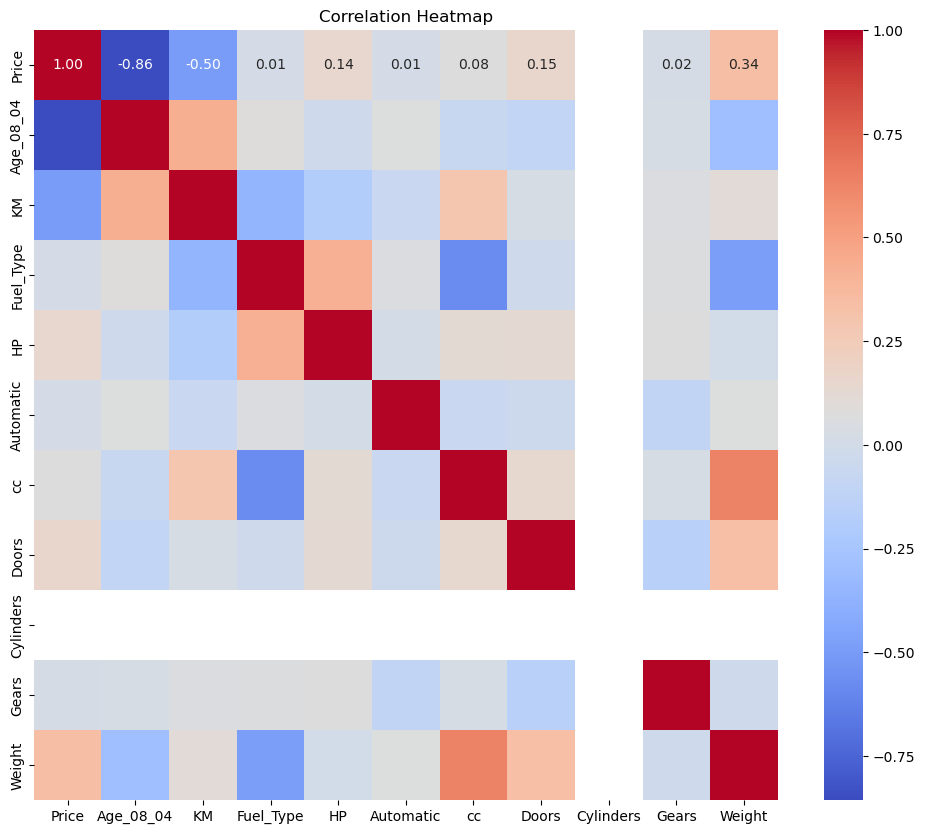

In [22]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df_new.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
std_sca = StandardScaler()

# Assuming 'df' is a pandas DataFrame and you want to scale all its numeric columns
scaled_data = std_sca.fit_transform(df_new)

# If you want to convert it back to a DataFrame with the same column names
scaled_df = pd.DataFrame(scaled_data, columns=df_new.columns)
scaled_df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,1.489185,-2.352101,-0.718332,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
1,1.596847,-2.352101,0.160637,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
2,1.682977,-2.286623,-0.896998,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
3,2.113624,-2.155665,-0.683988,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
4,1.596847,-1.893751,-1.005756,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.645737
...,...,...,...,...,...,...,...,...,...,...,...
1271,-1.094697,0.659918,-1.613931,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-0.953156
1272,0.345818,0.856355,-1.666227,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-1.201356
1273,-0.664050,0.790876,-1.733426,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-1.201356
1274,-1.202358,0.725397,-1.736813,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-1.201356


In [24]:
scaled_df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1276.000000,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1.276000e+03,1276.0,1.276000e+03,1.276000e+03
mean,0.000000,1.781925e-16,1.002333e-16,3.006999e-16,4.440892e-16,-5.568517e-18,-3.118369e-16,-2.450147e-16,0.0,1.531342e-15,2.116036e-15
std,1.000392,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,1.000392e+00,0.0,1.000392e+00,1.000392e+00
min,-2.408170,-3.006888e+00,-2.309729e+00,-5.650194e+00,-2.639372e+00,-2.427368e-01,-1.435003e+00,-2.104166e+00,0.0,-1.087071e+01,-1.573655e+00
25%,-0.685582,-6.496554e-01,-7.370116e-01,2.959071e-01,-9.198756e-01,-2.427368e-01,-8.549633e-01,-1.055780e+00,0.0,-1.304653e-01,-7.049568e-01
50%,-0.125741,2.015676e-01,-1.104952e-01,2.959071e-01,7.177404e-01,-2.427368e-01,3.051164e-01,-7.394570e-03,0.0,-1.304653e-01,-8.445788e-02
75%,0.520230,7.908759e-01,6.077250e-01,2.959071e-01,7.177404e-01,-2.427368e-01,3.051164e-01,1.040991e+00,0.0,-1.304653e-01,2.878415e-01
max,2.974918,1.380184e+00,2.814817e+00,2.959071e-01,1.209025e+00,4.119688e+00,2.625276e+00,1.040991e+00,0.0,5.239656e+00,1.369062e+01


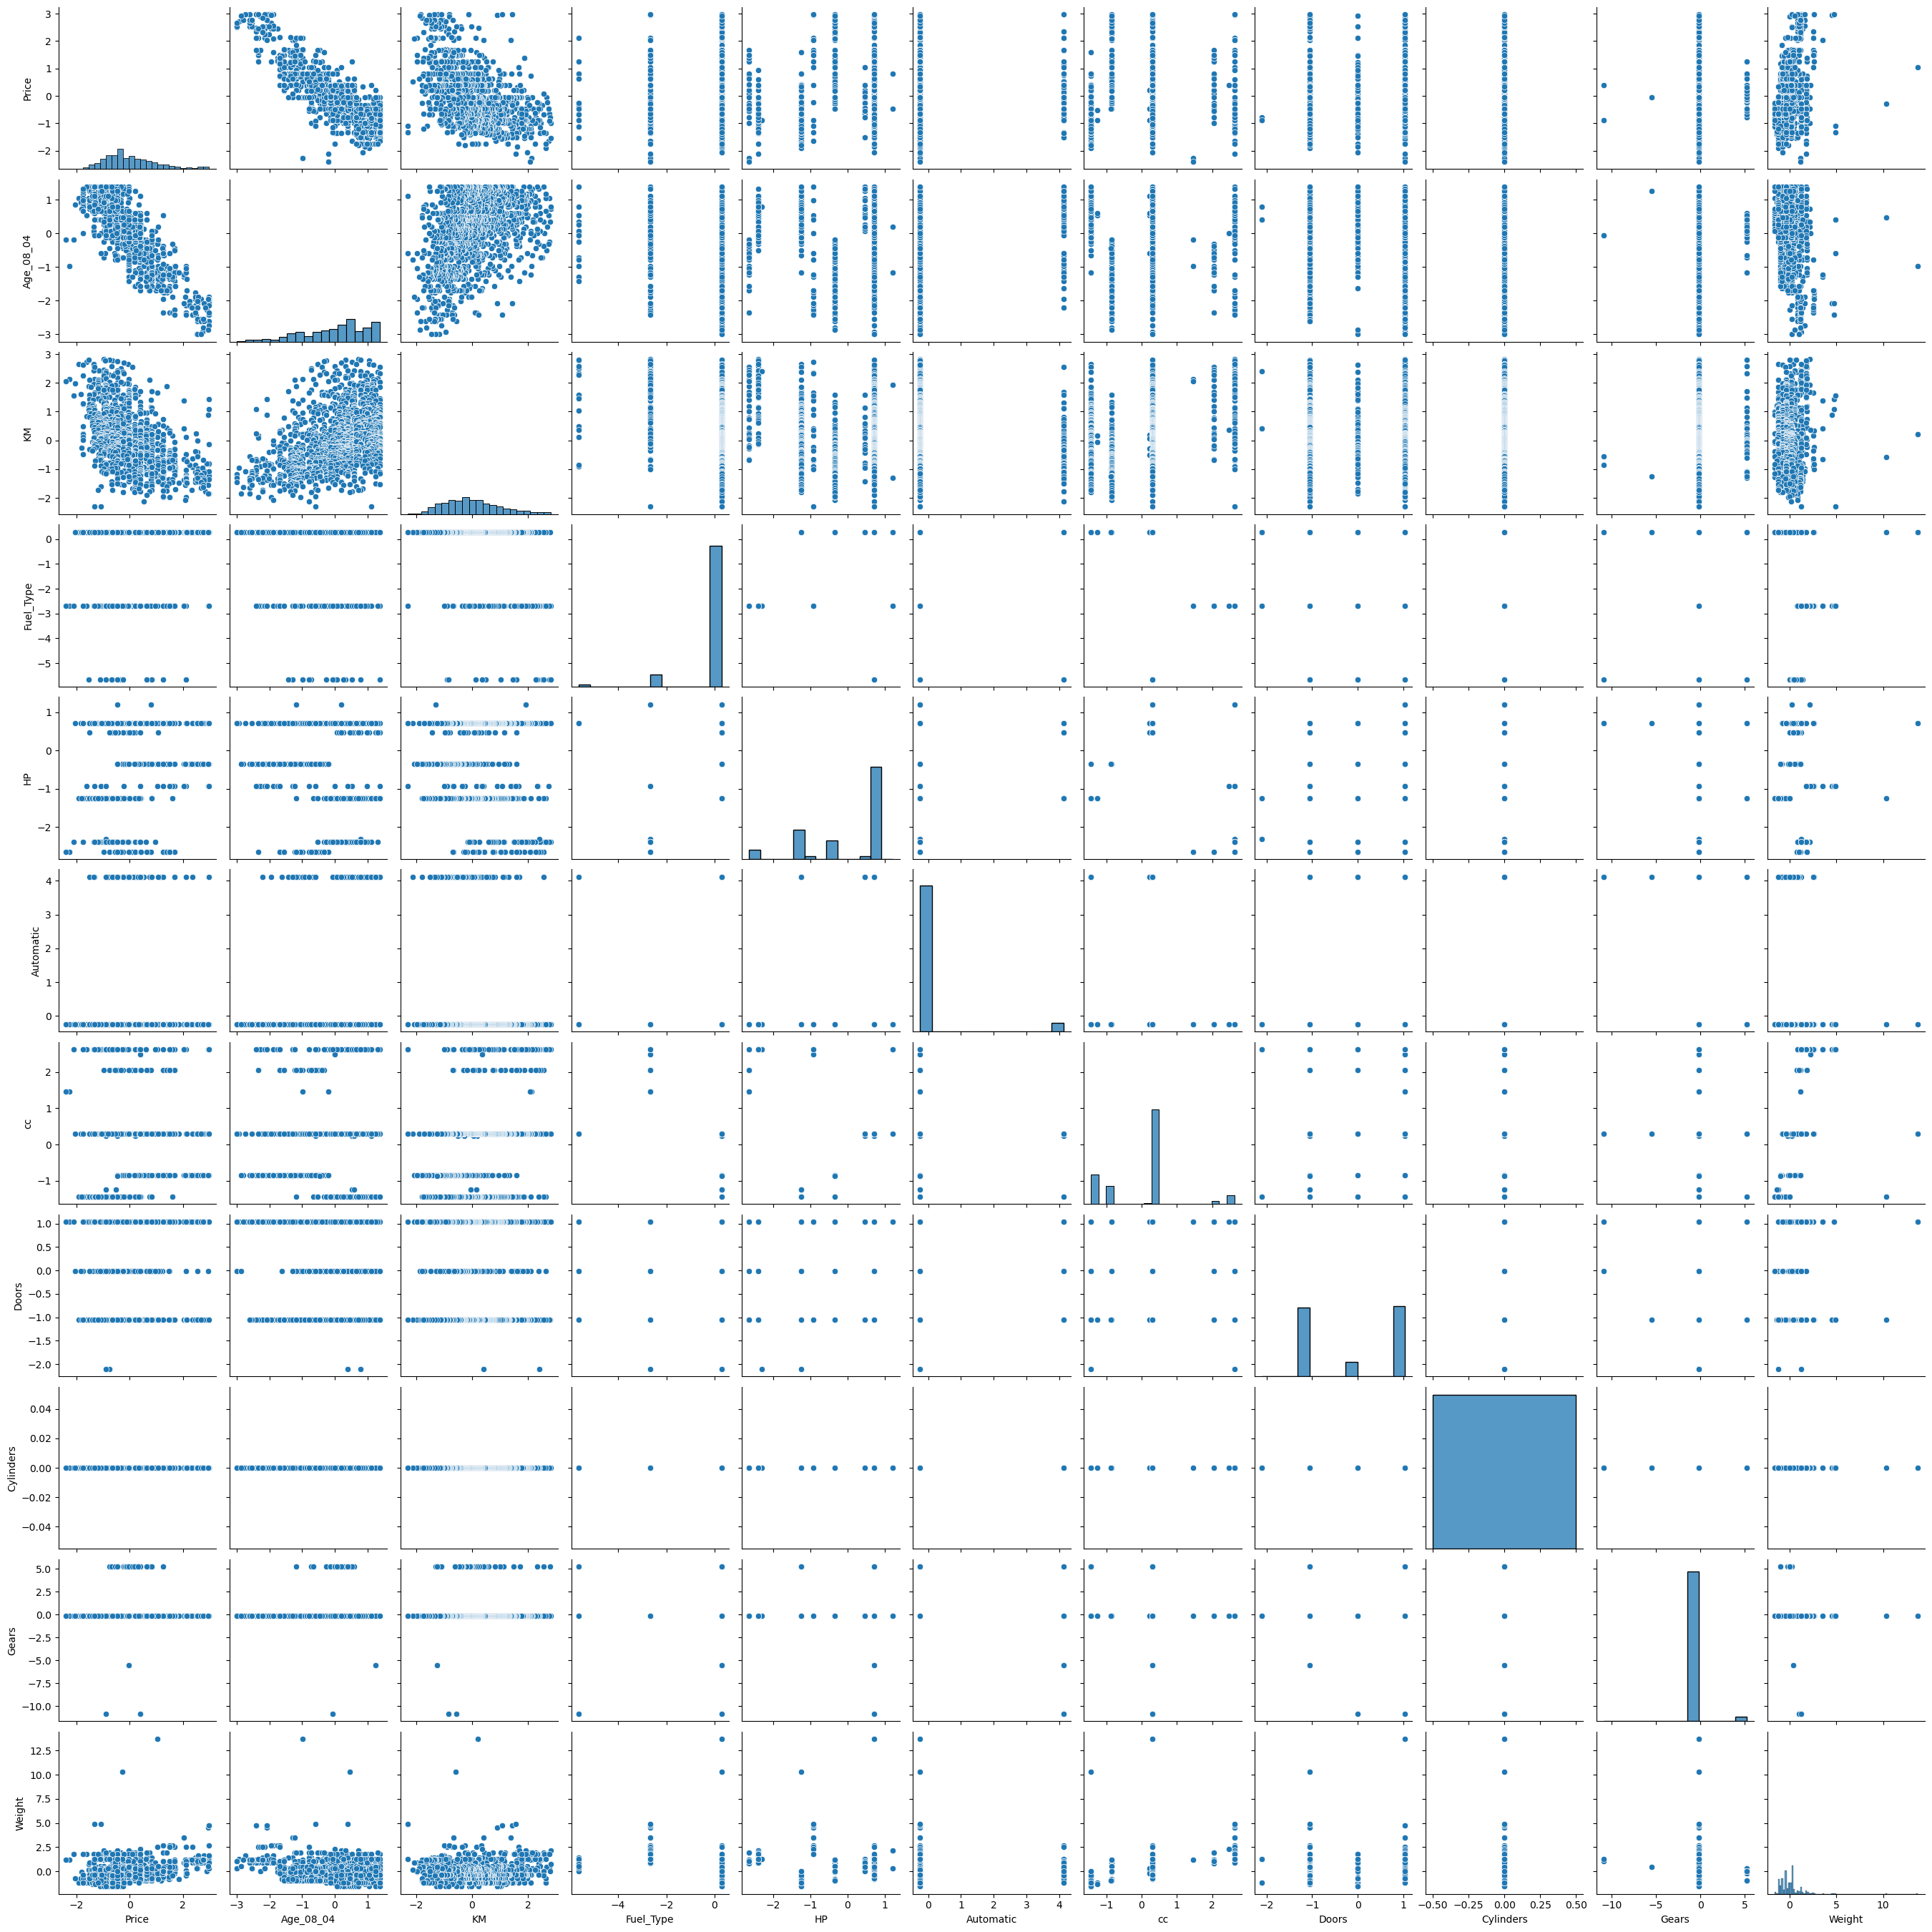

In [25]:
sns.pairplot(scaled_df)
plt.show()

# 2.Train Test Split (80-20)

In [26]:
## spliting of dataset into training and testing
from sklearn.model_selection import train_test_split
# let's split into feature and target data.
features=scaled_df.iloc[:,1:] # input variables (Independent variables)
features


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-2.352101,-0.718332,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
1,-2.352101,0.160637,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
2,-2.286623,-0.896998,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
3,-2.155665,-0.683988,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.521638
4,-1.893751,-1.005756,-2.677144,-0.919876,-0.242737,2.625276,-1.055780,0.0,-0.130465,2.645737
...,...,...,...,...,...,...,...,...,...,...
1271,0.659918,-1.613931,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-0.953156
1272,0.856355,-1.666227,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-1.201356
1273,0.790876,-1.733426,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-1.201356
1274,0.725397,-1.736813,0.295907,-1.247399,-0.242737,-1.435003,-1.055780,0.0,-0.130465,-1.201356


In [27]:
target=scaled_df.iloc[:,0]
target

0       1.489185
1       1.596847
2       1.682977
3       2.113624
4       1.596847
          ...   
1271   -1.094697
1272    0.345818
1273   -0.664050
1274   -1.202358
1275   -1.331552
Name: Price, Length: 1276, dtype: float64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=.20,random_state=42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (1020, 10)
Shape of X_test:  (256, 10)
Shape of y_train:  (1020,)
Shape of y_test:  (256,)


# 3 Regression models
## Model 1

In [29]:
## Train the model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
lin_reg.coef_

array([-7.45283611e-01, -1.75191274e-01,  5.46535360e-02,  5.87943382e-02,
        3.79706873e-02,  9.66020541e-03,  3.46250718e-02, -9.71445147e-17,
        5.97194895e-02,  1.41254147e-01])

* The above coefficients are b1,b2,b3,b4,b5, and b6 correspond to the terms in the equation: y_pred=b0 + b1x^1 + b2x^2 + b3x^3 + b4x^4 + b5x^5 + b6x^6 respectively.

In [31]:
b0=lin_reg.intercept_
b0

-0.009998691724218921

In [32]:
print('Training data score : ',lin_reg.score(x_train,y_train))
print('Testing data score : ',lin_reg.score(x_test,y_test))

Training data score :  0.7969095761150269
Testing data score :  0.7525949244991612


In [33]:
y_pred = lin_reg.predict(x_test)

In [34]:
# R2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("RMSE:", rmse)
print("MSE:", mse)

R2 Score: 0.7525949244991612
RMSE: 0.5063840828615751
MSE: 0.2564248393755586


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Checkig for multicollinearity using VIF(variance inflation factor)
def VIF(features):
    vif_data = pd.DataFrame()
    vif_data["variables"] = features.columns
    vif_data["VIF_values"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return vif_data
VIF(features)

,variables,VIF_values
0,Age_08_04,1.493004
1,KM,1.589616
2,Fuel_Type,2.576037
3,HP,1.659250
4,Automatic,1.070481
5,cc,2.637823
6,Doors,1.230139
7,Cylinders,NaN
8,Gears,1.064880
9,Weight,2.258634


In [36]:
# With all VIF scores below 10, multicollinearity concerns are minimized.

## Model 2

In [37]:
features2 = scaled_df[['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']]
target2 = scaled_df['Price']
x_train2,x_test2,y_train2,y_test2=train_test_split(features2,target,test_size=.20,random_state=42)
print("Shape of X_train: ",x_train2.shape)
print("Shape of X_test: ",x_test2.shape)
print("Shape of y_train: ",y_train2.shape)
print("Shape of y_test: ",y_test2.shape)

Shape of X_train:  (1020, 9)
Shape of X_test:  (256, 9)
Shape of y_train:  (1020,)
Shape of y_test:  (256,)


In [38]:
lin_reg=LinearRegression()
lin_reg.fit(x_train2,y_train2)
lin_reg.coef_,lin_reg.intercept_

(array([-0.74528361, -0.17519127,  0.05465354,  0.05879434,  0.03797069,
         0.00966021,  0.03462507,  0.05971949,  0.14125415]),
 -0.009998691724218923)

In [39]:
# Backward Elimination
import statsmodels.api as sm
features_with_const = sm.add_constant(features2)  # Add constant for intercept
model = sm.OLS(target2, features_with_const).fit()
while model.pvalues.max() > 0.05:
    worst_pval = model.pvalues.idxmax()  # Variable with max p-value
    features_with_const = features_with_const.drop(columns=[worst_pval])
    model = sm.OLS(target2, features_with_const).fit()

# Final model with selected features
final_model = sm.OLS(target2, features_with_const).fit()
print(final_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.788
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              590.2
Date:                Mon, 11 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:50:12   Log-Likelihood:                         -819.98
No. Observations:                1276   AIC:                                      1656.
Df Residuals:                    1268   BIC:                                      1697.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
# Initialize Ridge regression with an alpha parameter (regularization strength)
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)  # You may experiment with different alpha values
ridge.fit(x_train2, y_train2)

# Predictions and performance evaluation for Ridge regression
y_pred_ridge = ridge.predict(x_test2)
ridge_mse = mean_squared_error(y_test2, y_pred_ridge)
ridge_r2 = r2_score(y_test2, y_pred_ridge)

print("Ridge Regression Results:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R-squared: {ridge_r2}")
print("Coefficients:", ridge.coef_)

Ridge Regression Results:
Mean Squared Error: 0.2564071356943932
R-squared: 0.7526120054519505
Coefficients: [-0.74438078 -0.17547531  0.05445036  0.05880004  0.03787332  0.00961747
  0.03462717  0.05965759  0.14135074]


In [41]:
# Initialize Lasso regression with an alpha parameter
lasso = Lasso(alpha=0.1)  # Experiment with alpha to find the best balance
lasso.fit(x_train2, y_train2)

# Predictions and performance evaluation for Lasso regression
y_pred_lasso = lasso.predict(x_test2)
lasso_mse = mean_squared_error(y_test2, y_pred_lasso)
lasso_r2 = r2_score(y_test2, y_pred_lasso)

print("\nLasso Regression Results:")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R-squared: {lasso_r2}")
print("Coefficients:", lasso.coef_)


Lasso Regression Results:
Mean Squared Error: 0.28900363814645763
R-squared: 0.7211620875350477
Coefficients: [-0.69904761 -0.10896717  0.          0.0018259   0.          0.
  0.          0.          0.04363733]


**OLS Regression:**
* R-squared: 0.788, suggesting a strong fit, but there’s a high condition number (1.79e+17) and a small eigenvalue, indicating potential multicollinearity or linear dependence among predictors. This could still affect the stability of coefficients.

**Ridge Regression:**
* MSE: Lower than Lasso, but R-squared (0.753) is slightly lower than OLS, which is expected with Ridge regularization.
* Coefficients: All predictors have non-zero coefficients, with slightly reduced magnitudes, indicating Ridge managed multicollinearity effectively.

**Lasso Regression:**
* MSE: Higher than Ridge but lower than the initial OLS model, which indicates Lasso regularization might be simplifying the model at the cost of some predictive accuracy.
* Coefficients: Many coefficients are zeroed out, including Fuel_Type, HP, Automatic, Doors, Cylinders, and Gears, suggesting these predictors may have limited impact on Price in the presence of other variables.

## Model 3

In [43]:
features3 = scaled_df[['Age_08_04', 'KM', 'Weight']]
target3 = scaled_df['Price']
x_train3, x_test3, y_train3, y_test3 = train_test_split(features3, target3, test_size=0.2, random_state=0)
simplified_model = sm.OLS(y_train3, sm.add_constant(x_train3)).fit()
print(simplified_model.summary())

from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score

# Ridge Regression with Cross-Validation for alpha
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(x_train3, y_train3)
print("Best alpha for Ridge:", ridge_cv.alpha_)
print("Best Ridge MSE (CV):", -ridge_cv.best_score_)

# Lasso Regression with Cross-Validation for alpha
lasso_cv = LassoCV(alphas=[0.1, 0.01, 0.001], cv=5)
lasso_cv.fit(x_train3, y_train3)
print("Best alpha for Lasso:", lasso_cv.alpha_)
print("Best Lasso MSE (CV):", mean_squared_error(y_test3, lasso_cv.predict(x_test3)))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1157.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:52:43   Log-Likelihood:                -686.77
No. Observations:                1020   AIC:                             1382.
Df Residuals:                    1016   BIC:                             1401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.015      0.240      0.8

**OLS Regression Results:**
* R-squared: 0.774, indicating that 77.4% of the variance in Price is explained by Age_08_04, KM, and Weight.
  **Coefficients:**
* Age_08_04: Coefficient = -0.7236, showing a strong negative relationship with Price.
* KM: Coefficient = -0.2056, indicating that higher mileage leads to a decrease in Price.
* Weight: Coefficient = 0.1486, suggesting that greater weight is associated with an increase in Price.
* Condition Number: 1.81, indicating no significant multicollinearity issues in the simplified model.

**Ridge Regression (Cross-Validated):**
* Best Alpha: 1.0, as determined by cross-validation.
* Best MSE (CV): 0.2299, indicating the model’s mean squared error on validation sets.
* Coefficients: Ridge retains all three predictors, balancing regularization without eliminating variables.

**Lasso Regression (Cross-Validated):**
* Best Alpha: 0.01, as determined by cross-validation.
* Best MSE (CV): 0.2308, which is very close to the Ridge result, indicating similar predictive performance.
* Coefficients: Lasso retains all three predictors, with no coefficients reduced to zero due to the low alpha.

# Summary

* Model Fit: Both Ridge and Lasso yield very similar MSE values, suggesting comparable performance.
* Interpretability: The simplified OLS model and regularized Ridge and Lasso models provide similar insights, making any of them viable as the final model.
* Recommendation: If prediction accuracy is prioritized, Ridge offers a slight edge in MSE, while the OLS model offers the highest interpretability.

# Interview Questions:


**1.What is Normalization & Standardization and how is it helpful?**

Ans:- Normalization and standardization are preprocessing techniques commonly used in machine learning and data analysis to scale and transform features or variables. They are helpful for improving the performance and convergence of various machine learning algorithms.

Normalization: Normalization is the process of scaling individual samples to have unit norm, i.e., rescaling the features to a range between 0 and 1. It is typically performed on a per-feature basis. The most common normalization technique is Min-Max scaling, where each feature is scaled to a specific range, often between 0 and 1. Normalization is particularly useful when the features have different units or scales. It ensures that each feature contributes equally to the analysis and prevents certain features from dominating due to their larger scale. Standardization: Standardization is the process of rescaling features to have a mean of 0 and a standard deviation of 1. It involves subtracting the mean of each feature and then dividing by the standard deviation. Standardization is typically performed on a per-feature basis. It does not bound the values to a specific range like normalization but allows the data to maintain its original distribution. Standardization is particularly useful when the features have different scales and follow a Gaussian distribution (normal distribution). It helps algorithms that assume zero-centered data and equal variance across features to converge faster and perform better. How They Are Helpful:

Improved Model Performance: Normalization and standardization can help improve the performance of machine learning models by ensuring that features are on a similar scale, making it easier for the algorithm to learn the underlying patterns in the data. Faster Convergence: By scaling the features, normalization and standardization can lead to faster convergence of optimization algorithms, such as gradient descent, resulting in quicker model training. Reduced Sensitivity to Outliers: Normalization and standardization can reduce the sensitivity of machine learning algorithms to outliers by bringing all features to a comparable scale. Interpretability: Normalized or standardized features are often easier to interpret and compare, as they are transformed to a common scale.

**2.What techniques can be used to address multicollinearity in multiple linear regression?**

Ans :- Multicollinearity occurs when two or more predictor variables in a multiple linear regression model are highly correlated with each other. This can cause issues such as unstable coefficient estimates and difficulty in interpreting the model. Several techniques can be used to address multicollinearity in multiple linear regression:

1.Feature Selection: Remove one or more highly correlated predictors from the model. This can be done using techniques such as: Domain knowledge: Prioritize variables based on their theoretical importance and relevance to the outcome. Stepwise selection: Iteratively add or remove predictors based on statistical criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion). 2.Combine Variables: Create new composite variables by combining highly correlated predictors. For example, instead of including both height and weight as separate predictors, you could create a new variable called BMI (Body Mass Index) that incorporates both. 3.Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used to transform the original predictors into a smaller set of uncorrelated components. By retaining only the principal components that explain most of the variance in the data, multicollinearity can be reduced. 4.Ridge Regression: Ridge regression is a regularized regression technique that adds a penalty term to the regression coefficients, forcing them to shrink towards zero. This penalty term helps to reduce the impact of multicollinearity by stabilizing the coefficient estimates. 5.Variance Inflation Factor (VIF): Calculate the VIF for each predictor variable, which measures how much the variance of the estimated regression coefficients is inflated due to multicollinearity. Variables with high VIF values (typically above 5 or 10) may indicate multicollinearity issues and can be considered for removal. 6.Orthogonalization: Transform the predictor variables into orthogonal (uncorrelated) variables using techniques such as Gram-Schmidt orthogonalization. This can help reduce multicollinearity by creating a set of independent predictors. 7.Lasso Regression: Similar to ridge regression, lasso regression is a regularized regression technique that adds a penalty term to the absolute values of the regression coefficients. Lasso regression has the additional benefit of performing variable selection by shrinking some coefficients to exactly zero, effectively removing them from the model.